In [2]:
from theano.sandbox import cuda

In [3]:
%matplotlib inline
import utils; reload(utils)
from utils import *
from __future__ import division, print_function

Using Theano backend.


In [8]:
path = 'data/glove/'
res_path = path +'results/'

def load_glove(loc):
    return (load_array(loc+'.dat'),
           pickle.load(open(loc+'_words.pkl', 'rb')),
           pickle.load(open(loc+'_idx.pkl', 'rb')))

In [9]:
# Loading the glove model with 50 dimensional vectors.
vectors, words, wordidx = load_glove(res_path+'6B.50d')

# We have retrieved 400000 vectors of 50 "dimensions" each. 
vectors.shape

(400000, 50)

In [10]:
# Here are the first 25 words 
' '.join(words[:25])

'the , . of to and in a " \'s for - that on is was said with he as it by at ( )'

In [17]:
# This function defines a way to retrieve vectors depending upon a word index.
def w2vec(w):
    return vectors[wordidx[w]]

In [18]:
# Below, you can see the 50 dimensional vector that pertains to the word "the"
# as authored by the glove authors.
w2vec('the')

array([  4.1800e-01,   2.4968e-01,  -4.1242e-01,   1.2170e-01,   3.4527e-01,  -4.4457e-02,
        -4.9688e-01,  -1.7862e-01,  -6.6023e-04,  -6.5660e-01,   2.7843e-01,  -1.4767e-01,
        -5.5677e-01,   1.4658e-01,  -9.5095e-03,   1.1658e-02,   1.0204e-01,  -1.2792e-01,
        -8.4430e-01,  -1.2181e-01,  -1.6801e-02,  -3.3279e-01,  -1.5520e-01,  -2.3131e-01,
        -1.9181e-01,  -1.8823e+00,  -7.6746e-01,   9.9051e-02,  -4.2125e-01,  -1.9526e-01,
         4.0071e+00,  -1.8594e-01,  -5.2287e-01,  -3.1681e-01,   5.9213e-04,   7.4449e-03,
         1.7778e-01,  -1.5897e-01,   1.2041e-02,  -5.4223e-02,  -2.9871e-01,  -1.5749e-01,
        -3.4758e-01,  -4.5637e-02,  -4.4251e-01,   1.8785e-01,   2.7849e-03,  -1.8411e-01,
        -1.1514e-01,  -7.8581e-01], dtype=float32)

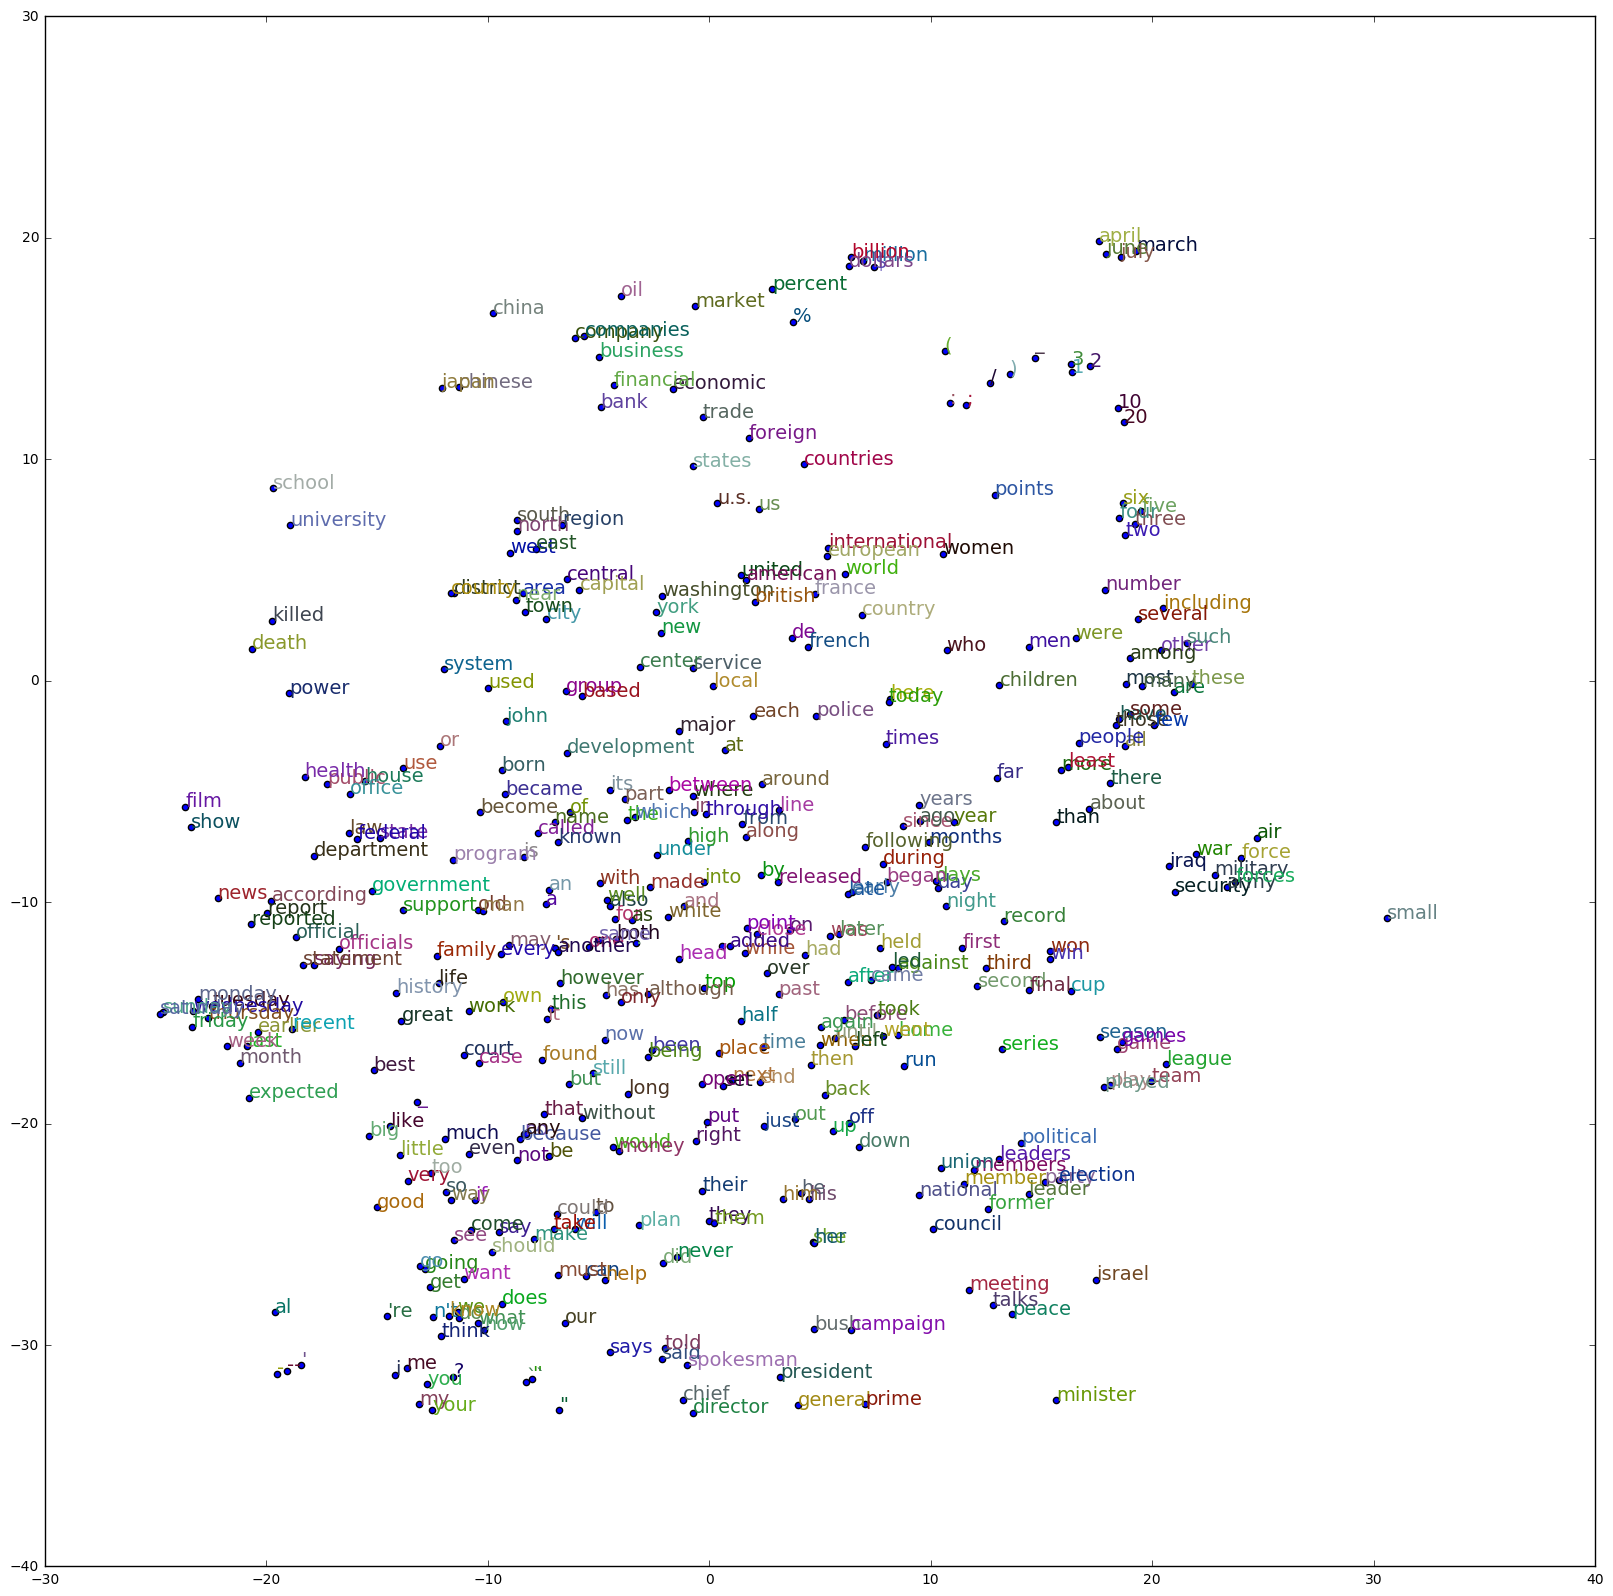

In [35]:
# This allows for switching ASCII characters to utf-8 encoding
# reload(sys)
# sys.setdefaultencoding('utf8')

# Defining a TSNE(dimensionality reduction function to a 2 dimensional state)
tsne = TSNE(n_components=2, random_state=0)
# Fitting the first 500 vectors into the above defined 2 dimensional state
Y = tsne.fit_transform(vectors[:500])

start = 0; end = 400
# The embeded data is now no longer 50 dimensions
dat = Y[start:end]
# We define the plot size to be 20 by 20
plt.figure(figsize=(20,20))
plt.scatter(dat[:, 0], dat[:, 1])

for label, x,y in zip(words[start:end], dat[:,0], dat[:,1]):
    plt.text(x,y,label,color=np.random.rand(3)*0.7, fontsize=14)

# It is clearly visible that by conducting a Tsne dimensionality reduction on
# Pre trained word vectors, we are clearly able to see the relationships captured
# by the model.
plt.show()

In [37]:
model_path = 'data/imdb/models'

In [38]:
# Retrieving the IMDB movie-review dataset as pre-disposed by the authors of Keras
from keras.datasets import imdb
idx = imdb.get_word_index()

In [43]:
# There are a total of 88582 words in the imdb corpus
idx

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [41]:
# The indices of the array are sorted so as to order the words.
idx_arr = sorted(idx, key=idx.get)
idx_arr[:10]

['the', 'and', 'a', 'of', 'to', 'is', 'br', 'in', 'it', 'i']

In [45]:
# Mapping the index to word, as we already know the word to index.
idx2word = {valu: key for key, valu in idx.iteritems()}

In [46]:
idx2word

{1: 'the',
 2: 'and',
 3: 'a',
 4: 'of',
 5: 'to',
 6: 'is',
 7: 'br',
 8: 'in',
 9: 'it',
 10: 'i',
 11: 'this',
 12: 'that',
 13: 'was',
 14: 'as',
 15: 'for',
 16: 'with',
 17: 'movie',
 18: 'but',
 19: 'film',
 20: 'on',
 21: 'not',
 22: 'you',
 23: 'are',
 24: 'his',
 25: 'have',
 26: 'he',
 27: 'be',
 28: 'one',
 29: 'all',
 30: 'at',
 31: 'by',
 32: 'an',
 33: 'they',
 34: 'who',
 35: 'so',
 36: 'from',
 37: 'like',
 38: 'her',
 39: 'or',
 40: 'just',
 41: 'about',
 42: "it's",
 43: 'out',
 44: 'has',
 45: 'if',
 46: 'some',
 47: 'there',
 48: 'what',
 49: 'good',
 50: 'more',
 51: 'when',
 52: 'very',
 53: 'up',
 54: 'no',
 55: 'time',
 56: 'she',
 57: 'even',
 58: 'my',
 59: 'would',
 60: 'which',
 61: 'only',
 62: 'story',
 63: 'really',
 64: 'see',
 65: 'their',
 66: 'had',
 67: 'can',
 68: 'were',
 69: 'me',
 70: 'well',
 71: 'than',
 72: 'we',
 73: 'much',
 74: 'been',
 75: 'bad',
 76: 'get',
 77: 'will',
 78: 'do',
 79: 'also',
 80: 'into',
 81: 'people',
 82: 'other',
 8

In [47]:
# The imdb reviews and their sentiments are then downloaded
path = get_file('imdb_full.pkl',
                origin='https://s3.amazonaws.com/text-datasets/imdb_full.pkl',
                md5_hash='d091312047c43cf9e4e38fef92437263')
f = open(path, 'rb')
(x_train, labels_train), (x_test, labels_test) = pickle.load(f)

In [56]:
# We can check the length of the first review(139 words)
len(x_train)

25000

In [49]:
# We can retrieve the ids of the words because that is the form the reviews are provided
', '.join(map(str, x_train[0]))

'23022, 309, 6, 3, 1069, 209, 9, 2175, 30, 1, 169, 55, 14, 46, 82, 5869, 41, 393, 110, 138, 14, 5359, 58, 4477, 150, 8, 1, 5032, 5948, 482, 69, 5, 261, 12, 23022, 73935, 2003, 6, 73, 2436, 5, 632, 71, 6, 5359, 1, 25279, 5, 2004, 10471, 1, 5941, 1534, 34, 67, 64, 205, 140, 65, 1232, 63526, 21145, 1, 49265, 4, 1, 223, 901, 29, 3024, 69, 4, 1, 5863, 10, 694, 2, 65, 1534, 51, 10, 216, 1, 387, 8, 60, 3, 1472, 3724, 802, 5, 3521, 177, 1, 393, 10, 1238, 14030, 30, 309, 3, 353, 344, 2989, 143, 130, 5, 7804, 28, 4, 126, 5359, 1472, 2375, 5, 23022, 309, 10, 532, 12, 108, 1470, 4, 58, 556, 101, 12, 23022, 309, 6, 227, 4187, 48, 3, 2237, 12, 9, 215'

In [52]:
# The first review is a positive one.
labels_train[0]

1

In [53]:
idx2word[23022]

'bromwell'

In [54]:
# We can perform the index to word conversion on the first movie review.
' '.join([idx2word[o] for o in x_train[0]])

"bromwell high is a cartoon comedy it ran at the same time as some other programs about school life such as teachers my 35 years in the teaching profession lead me to believe that bromwell high's satire is much closer to reality than is teachers the scramble to survive financially the insightful students who can see right through their pathetic teachers' pomp the pettiness of the whole situation all remind me of the schools i knew and their students when i saw the episode in which a student repeatedly tried to burn down the school i immediately recalled at high a classic line inspector i'm here to sack one of your teachers student welcome to bromwell high i expect that many adults of my age think that bromwell high is far fetched what a pity that it isn't"

In [55]:
# The first 10 movie review labels
labels_train[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [57]:
# The size of the vocabulary is reduced from 25000 to 5000
vocab_size = 5000

# If the id of the word is less than 5000, leave it be. If not, set the idx value to 5000-1
trn = [np.array([i if i < vocab_size - 1 else vocab_size - 1 for i in s]) for s in x_train]
test = [np.array([i if i < vocab_size - 1 else vocab_size - 1 for i in s]) for s in x_test]

In [59]:
# As visible, the word "bromwell" from above had the id 23022, which is greater than
# 5000, therefore, it is given an id of 4999
trn[0]

array([4999,  309,    6,    3, 1069,  209,    9, 2175,   30,    1,  169,   55,   14,   46,   82,
       4999,   41,  393,  110,  138,   14, 4999,   58, 4477,  150,    8,    1, 4999, 4999,  482,
         69,    5,  261,   12, 4999, 4999, 2003,    6,   73, 2436,    5,  632,   71,    6, 4999,
          1, 4999,    5, 2004, 4999,    1, 4999, 1534,   34,   67,   64,  205,  140,   65, 1232,
       4999, 4999,    1, 4999,    4,    1,  223,  901,   29, 3024,   69,    4,    1, 4999,   10,
        694,    2,   65, 1534,   51,   10,  216,    1,  387,    8,   60,    3, 1472, 3724,  802,
          5, 3521,  177,    1,  393,   10, 1238, 4999,   30,  309,    3,  353,  344, 2989,  143,
        130,    5, 4999,   28,    4,  126, 4999, 1472, 2375,    5, 4999,  309,   10,  532,   12,
        108, 1470,    4,   58,  556,  101,   12, 4999,  309,    6,  227, 4187,   48,    3, 2237,
         12,    9,  215])

In [58]:
# Below is the distribution o the sentences
lens = np.array(map(len, trn))
# The longest review is 2493 words, the shortest is 10 words and the median review length is 238 words
(lens.max(), lens.min(), lens.mean())

(2493, 10, 237.71364)

In [61]:
# Each sentence is padded to make it a specific length to make it consistent
seq_len = 500

# Sentences that are not of length 500 are padded, and sentences that are of greater than 500 words are truncated to 500.
trn = sequence.pad_sequences(trn, maxlen=seq_len, value=0)
test = sequence.pad_sequences(test, maxlen=seq_len, value=0)

In [64]:
# The first review is 139 characters long, therefore, to make it of
# seq_len, it is padded with zeroes.
trn[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,

In [65]:
# The results of the training matrices are of length 500.
# Reviews less than 500 words are padded with zeros
# Reviews with more than 500 words are truncated to 500 words.
trn.shape

(25000, 500)

In [66]:
# The first attempt at performing sentiment analysis is carried out using
# A simple Neural model with one hidden layer
model = Sequential([
        # 32 embeddings.
        Embedding(vocab_size, 32, input_length=seq_len),
        Flatten(),
        Dense(100, activation='relu'),
        Dropout(0.7),
        # Either the review is positive or negative. So, we are returned a one or a zero.
        Dense(1, activation='sigmoid')
    ])

In [67]:
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
# model.summary()

In [68]:
# The model overfit and achieved a training accuracy of 92%, and validationa accuracy of 88%
model.fit(trn, labels_train, validation_data=(test, labels_test), nb_epoch=2, batch_size=64)

In [69]:
# Designing a one dimesnional convolutional architecture.
# I 1D convolutional layer because the word sequences are one dimensional
conv1 = Sequential([
        Embedding(vocab_size, 32, input_length=seq_len, dropout=0.2),
        Dropout(0.2),
        Convolution1D(64, 5, border_mode='same', activation='relu'),
        Dropout(0.2),
        MaxPooling1D(),
        Flatten(),
        Dense(100, activation='relu'),
        Dropout(0.7),
        Dense(1, activation='sigmoid')
    ])

In [70]:
conv1.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [71]:
# Upon running the above model, I was able to achieve 90.64 training accuracy
# and an 89.6% validation accuracy, which beats the academic state of the art by Stanford.
conv1.fit(trn, labels_train, validation_data=(test, labels_test), nb_epoch=4, batch_size=64)

In [72]:
conv1.save_weights(model_path + 'convol1d.h5')

In [73]:
conv1.load_weights(model_path + 'convol1d.h5')

In [76]:
vectors.shape

(400000, 50)

In [77]:
# Creating an embedding matrix using the pretrained vectors downloaded in the beginning of this ipynb
def create_embedding():
    # These are the number of latent factors
    n_fact = vectors.shape[1]
    emb = np.zeros((vocab_size, n_fact))
    
    for i in range(1, len(emb)):
        word = idx2word[i]
        if word and re.match(r"^[a-zA-Z0-9\-]*$", word):
            src_idx = wordidx[word]
            emb[i] = vectors[src_idx]
        else:
            # if a word from imdb is not found in glove, an embedding is randomly initialized
            emb[i] = normal(scale=0.6, size=(n_fact,))
    
    emb[-1] = normal(scale=0.6, size=(n_fact,))
    emb/=3
    return emb

In [82]:
emb = create_embedding()
emb.shape

(5000, 50)

In [83]:
# Since we now have a pre-trained embeddings matrix from the glove model,
# We can simply pass it into the Embedding Layer of Keras, and we set trainable to false
# since the embeddings have already been trained.
model = Sequential([
        Embedding(vocab_size, 50, input_length=seq_len, dropout=0.2, weights=[emb], trainable=False),
        Dropout(0.25),
        Convolution1D(64, 5, border_mode='same', activation='relu'),
        Dropout(0.25),
        MaxPooling1D(),
        Flatten(),
        Dense(100, activation='relu'),
        Dropout(0.7),
        Dense(1, activation='sigmoid')
    ])

In [86]:
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
# After training the model on 6 epochs, I finally overfit and achieved an accuracy(training) of 80%
# and a validation accuracy of 77%
model.fit(trn, labels_train, validation_data=(test, labels_test), nb_epoch=3, batch_size=64)

In [87]:
# Since some of the word embeddings were randomly initialized by the create_embedding function,
# Finetuning the first layer seems like the next logical step.
model.layers[0].trainable=True
model.optimizer.lr = 1e-4

In [90]:
# As expected, a nice boost is achieved, and the training accuracy is now at 84.2%
model.fit(trn, labels_train, validation_data=(test, labels_test), nb_epoch=7, batch_size=64)

In [91]:
model.save_weights(model_path+'glove_kelin.h5')